# Section 4 - Optimization and Gradients
## Notebook imports and packages

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Example 1 - simple cost function

### $$f(x) = x^2 + x + 1$$

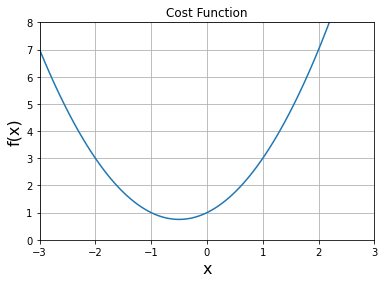

In [15]:
def f(x):
    return x**2 + x + 1

# Make some data
x_1 = np.linspace(start = - 3, stop = 3, num = 100)
#print(x_1[0:10])

plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_1, f(x_1))
plt.show()

## Slope and derivatives

In [16]:
def df(x):
    return 2*x + 1 # by power rule

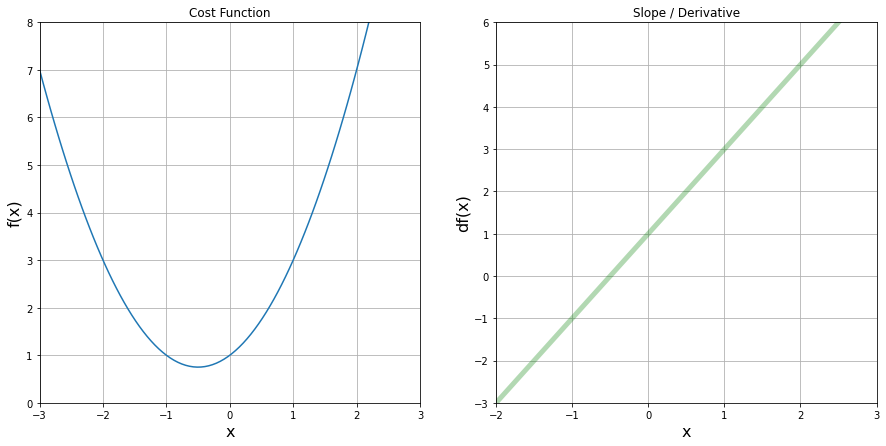

In [26]:
plt.figure(figsize = [15, 7])

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_1, f(x_1))

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim([-2, 3])
plt.ylim(-3,6)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Slope / Derivative')
plt.grid()
plt.plot(x_1, df(x_1), color = "green", linewidth = 5, alpha = 0.3)

plt.show()

## Python loops and gradient descent

In [37]:
# Gradient descent
new_x = 3
prev_x = 0
learning_rate = 0.1
num_steps = 300
precision = 0.0001

x_values = [new_x]
slopes = [df(new_x)]

for n in range(num_steps):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - (learning_rate * gradient)
    step_size = abs(new_x - prev_x)
    
    x_values.append(new_x)
    slopes.append(df(new_x))
    if step_size < precision:
        print('Breaking at ', n, ' for precision')
        break
    
print('Found local min at: ', new_x)
print('df(x) at local min is: ', df(new_x))
print('f(x) or cost at local min is :', f(new_x))
#print(slopes)

Breaking at  40  for precision
Found local min at:  -0.49962781616118024
df(x) at local min is:  0.0007443676776395236
f(x) or cost at local min is : 0.7500001385208099


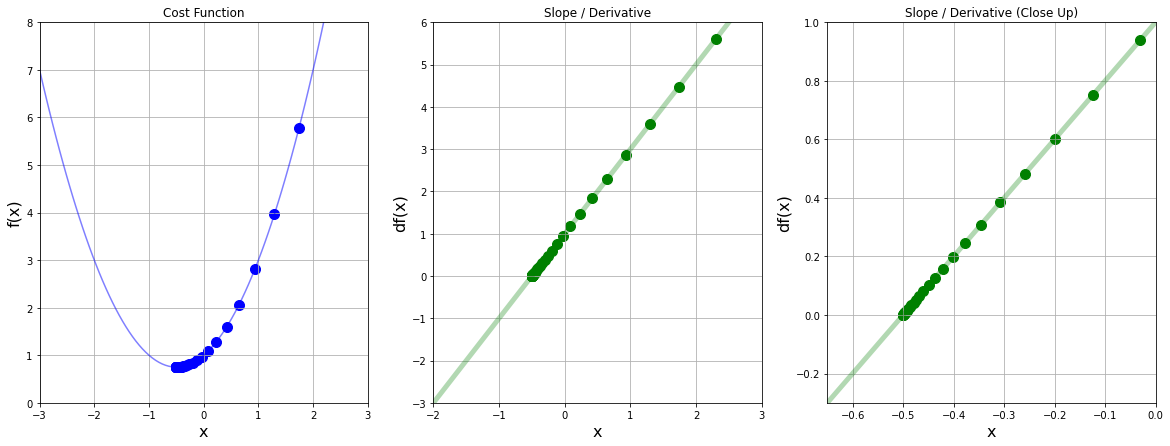

In [52]:
plt.figure(figsize = [20, 7])

# Plot 1
plt.subplot(1, 3, 1)
plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_1, f(x_1), color = 'blue', alpha = 0.5)
plt.scatter(x_values, f(np.array(x_values)), color = 'blue', s = 100)

# Plot 2
plt.subplot(1, 3, 2)
plt.xlim([-2, 3])
plt.ylim(-3,6)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Slope / Derivative')
plt.grid()
plt.plot(x_1, df(x_1), color = "green", linewidth = 5, alpha = 0.3)
plt.scatter(x_values, df(np.array(x_values)), color = 'green', s = 100)

# Plot 3
plt.subplot(1, 3, 3)
plt.xlim([-0.65, 0])
plt.ylim(-0.3,1)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Slope / Derivative (Close Up)')
plt.grid()
plt.plot(x_1, df(x_1), color = "green", linewidth = 5, alpha = 0.3)
plt.scatter(x_values, df(np.array(x_values)), color = 'green', s = 100)

plt.show()